In [ ]:
# Import Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import kaleido

In [ ]:
# Set view to show max rows
pd.set_option('display.max_row', None)

# Load dataset
df = pd.read_csv('cleaned_data.csv')
df.drop(columns=['Unnamed: 0'],axis= 1, inplace=True)

# Make a copy of dataset
wdf = df.copy()

In [17]:
# Filter data for analysis
data_for_analysis = wdf[['City', 'State', 'Term', 'NoEmp', 'ApprovalFY',
       'LowDoc', 'MIS_Status', 'GrAppv',  'Industry',
       'FranchiseCode_Encoded', 'NewExist', 'RevLineCr',
       'RealEstate_Backed', 'Region', 'Recession']]

### Loan Performance by City

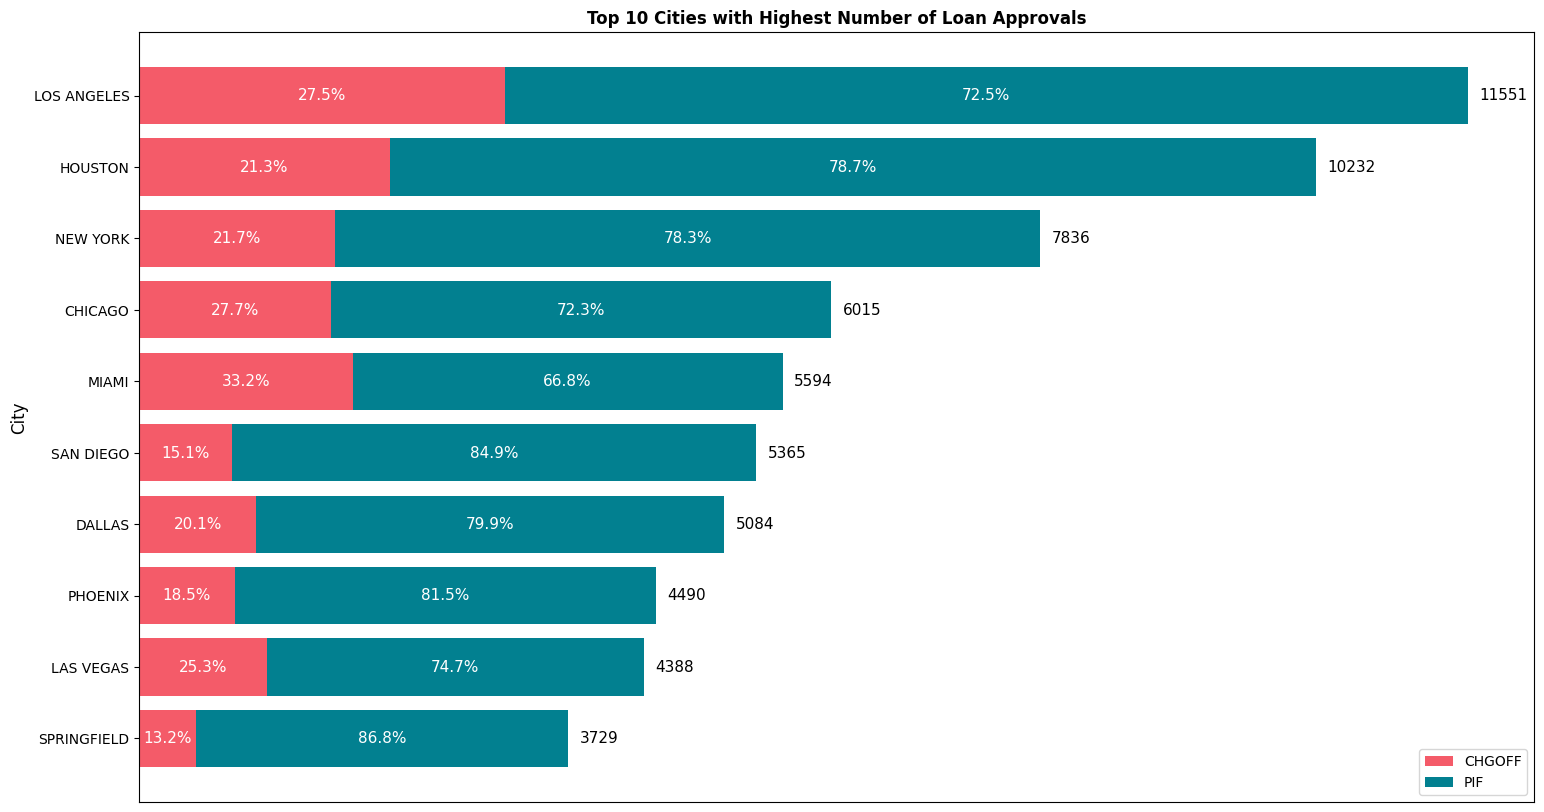

In [8]:
# Aggregate data by city and MIS_Status using size
selected_cities = data_for_analysis.groupby(['City', 'MIS_Status']).size().unstack(fill_value=0)

# Calculate the total count by city
selected_cities['Total'] = selected_cities.sum(axis=1)

# Sort the DataFrame by total count in descending order
selected_cities = selected_cities.sort_values(by='Total', ascending=False)

# Filter to include only the top 10 cities
selected_cities = selected_cities.head(10)

# Calculate the percentage of CHGOFF and PIF loans
selected_cities['CHGOFF_Percentage'] = (selected_cities['CHGOFF'] / selected_cities['Total']) * 100
selected_cities['PIF_Percentage'] = (selected_cities['PIF'] / selected_cities['Total']) * 100

# Define color palette
colors = ['#F45B69', '#028090']  # Colors for CHGOFF and PIF

# Plot
plt.figure(figsize=(18, 10))
bars1 = plt.barh(selected_cities.index, selected_cities['CHGOFF'], color=colors[0], label='CHGOFF')
bars2 = plt.barh(selected_cities.index, selected_cities['PIF'], left=selected_cities['CHGOFF'], color=colors[1], label='PIF')

plt.xlabel('')
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities with Highest Number of Loan Approvals', fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their percentages and total counts
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = selected_cities['Total'].iloc[i]
    chgoff_percentage = selected_cities['CHGOFF_Percentage'].iloc[i]
    pif_percentage = selected_cities['PIF_Percentage'].iloc[i]
    # Annotate CHGOFF percentage
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{chgoff_percentage:.1f}%', ha='center', va='center', fontsize=11, color='white')
    # Annotate PIF percentage
    plt.text(bar1.get_width() + bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{pif_percentage:.1f}%', ha='center', va='center', fontsize=11, color='white')
    # Annotate total count
    plt.text(total + 100, bar1.get_y() + bar1.get_height() / 2, f'{int(total)}', va='center', fontsize=11)

# Add legend
plt.legend()

# Remove x-axis ticks
plt.xticks([])

# Save before showing
plt.savefig('loan_approvals_by_city.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

# Show the plot
plt.show()

#### Which states have the highest number of loan approval? 

In [54]:
# Install nbformat
%pip install nbformat

# Aggregate data by state
state_data = data_for_analysis.groupby('State').agg(
    total_approvals=('State', 'size'),
    total_amount_approved=('GrAppv', 'sum')
).reset_index()

# Format the total_amount_approved column with dollar signs and commas
state_data['total_amount_approved'] = state_data['total_amount_approved'].apply(lambda x: f"${x:,.2f}")

# Updated dictionary mapping state abbreviations (and DC) to centroid coordinates.
state_coords = {
    'AL': {'lat': 32.806671, 'lon': -86.791130},
    'AK': {'lat': 61.370716, 'lon': -152.404419},
    'AZ': {'lat': 33.729759, 'lon': -111.431221},
    'AR': {'lat': 34.969704, 'lon': -92.373123},
    'CA': {'lat': 36.116203, 'lon': -119.681564},
    'CO': {'lat': 39.059811, 'lon': -105.311104},
    'CT': {'lat': 41.597782, 'lon': -72.755371},
    'DE': {'lat': 39.318523, 'lon': -75.507141},
    'DC': {'lat': 38.9072,   'lon': -77.0369},  
    'FL': {'lat': 27.766279, 'lon': -81.686783},
    'GA': {'lat': 33.040619, 'lon': -83.643074},
    'HI': {'lat': 21.094318, 'lon': -157.498337},
    'ID': {'lat': 44.240459, 'lon': -114.478828},
    'IL': {'lat': 40.349457, 'lon': -88.986137},
    'IN': {'lat': 39.849426, 'lon': -86.258278},
    'IA': {'lat': 42.011539, 'lon': -93.210526},
    'KS': {'lat': 38.526600, 'lon': -96.726486},
    'KY': {'lat': 37.668140, 'lon': -84.670067},
    'LA': {'lat': 31.169546, 'lon': -91.867805},
    'ME': {'lat': 44.693947, 'lon': -69.381927},
    'MD': {'lat': 39.063946, 'lon': -76.802101},
    'MA': {'lat': 42.230171, 'lon': -71.530106},
    'MI': {'lat': 43.326618, 'lon': -84.536095},
    'MN': {'lat': 45.694454, 'lon': -93.900192},
    'MS': {'lat': 32.741646, 'lon': -89.678696},
    'MO': {'lat': 38.456085, 'lon': -92.288368},
    'MT': {'lat': 46.921925, 'lon': -110.454353},
    'NE': {'lat': 41.125370, 'lon': -98.268082},
    'NV': {'lat': 38.313515, 'lon': -117.055374},
    'NH': {'lat': 43.452492, 'lon': -71.563896},
    'NJ': {'lat': 40.298904, 'lon': -74.521011},
    'NM': {'lat': 34.840515, 'lon': -106.248482},
    'NY': {'lat': 42.165726, 'lon': -74.948051},
    'NC': {'lat': 35.630066, 'lon': -79.806419},
    'ND': {'lat': 47.528912, 'lon': -99.784012},
    'OH': {'lat': 40.388783, 'lon': -82.764915},
    'OK': {'lat': 35.565342, 'lon': -96.928917},
    'OR': {'lat': 44.572021, 'lon': -122.070938},
    'PA': {'lat': 40.590752, 'lon': -77.209755},
    'RI': {'lat': 41.680893, 'lon': -71.511780},
    'SC': {'lat': 33.856892, 'lon': -80.945007},
    'SD': {'lat': 44.299782, 'lon': -99.438828},
    'TN': {'lat': 35.747845, 'lon': -86.692345},
    'TX': {'lat': 31.054487, 'lon': -97.563461},
    'UT': {'lat': 40.150032, 'lon': -111.862434},
    'VT': {'lat': 44.045876, 'lon': -72.710686},
    'VA': {'lat': 37.769337, 'lon': -78.169968},
    'WA': {'lat': 47.400902, 'lon': -121.490494},
    'WV': {'lat': 38.491226, 'lon': -80.954453},
    'WI': {'lat': 44.268543, 'lon': -89.616508},
    'WY': {'lat': 42.755966, 'lon': -107.302490}
}

# Merge latitude and longitude into your state_data DataFrame.
state_data['lat'] = state_data['State'].map(lambda x: state_coords[x]['lat'])
state_data['lon'] = state_data['State'].map(lambda x: state_coords[x]['lon'])

# Create the choropleth map.
fig = px.choropleth(
    state_data,
    locations='State',
    locationmode='USA-states',
    color='total_approvals',
    hover_name='State',
    hover_data={
        'total_amount_approved': True,
        'total_approvals': True,
        'State': False  # Avoid duplicate state names in hover
    },
    color_continuous_scale='temps',
    scope='usa',
    labels={'total_approvals': 'Total Number of Approved Loans'},
)

fig.update_layout(
    title_text='Total Loan Approvals by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection_type='albers usa',
        showlakes=True,
        showcoastlines=True,
        showland=True,
        showsubunits=True,
        subunitcolor="black",
    ),
    width=1300,
    height=800,
    margin=dict(l=5, r=0, t=70, b=0),
    title=dict(font=dict(size=28, color='black')),
    font=dict(size=16, family="Franklin Gothic"),
    coloraxis_colorbar=dict(
        title=dict(
            text="Total Number of Approved Loans",
            font=dict(size=20)
        ),
        tickfont=dict(size=18)
    )
)

# Add a scattergeo trace for state initials.
fig.add_trace(
    go.Scattergeo(
        locationmode='USA-states',
        lon=state_data['lon'],
        lat=state_data['lat'],
        text=state_data['State'],
        mode='text',
        showlegend=False,
        textfont=dict(size=14, color="black")
    )
)

# Save and display the figure.
fig.write_image("loan_approvals_by_state.png", width=1300, height=800, scale=2)
fig.write_html("Loans_by_State.html")
fig.show()

# Show the plot
# plt.show()

#fig.write_image("loan_approvals_by_state.png", width=1300, height=800, scale=2)  # Save as PNG
#fig.write_html("Loans_by_State.html")  # Save as interactive HTML

Note: you may need to restart the kernel to use updated packages.


### Loan Performance by Region

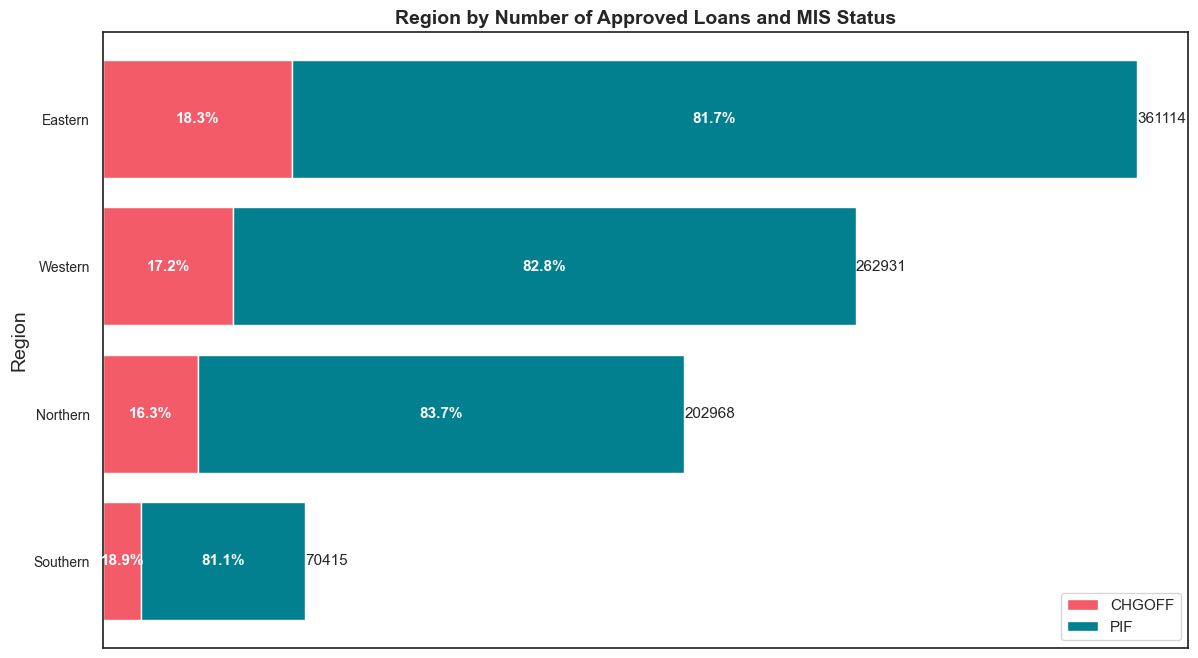

In [60]:
# Aggregate data by region and MIS_Status using size
regional_approval = data_for_analysis.groupby(['Region', 'MIS_Status']).size().unstack(fill_value=0)

# Sort the DataFrame by total count in descending order
regional_approval['Total'] = regional_approval.sum(axis=1)
regional_approval = regional_approval.sort_values(by='Total', ascending=False)

# Calculate the percentage of CHGOFF and PIF loans
regional_approval['CHGOFF_Percentage'] = (regional_approval['CHGOFF'] / regional_approval['Total']) * 100
regional_approval['PIF_Percentage'] = (regional_approval['PIF'] / regional_approval['Total']) * 100

# Define color palette
colors = ['#F45B69', '#028090']  # Colors for CHGOFF and PIF

# Plot
plt.figure(figsize=(14, 8))
bars1 = plt.barh(regional_approval.index, regional_approval['CHGOFF'], color=colors[0], label='CHGOFF')
bars2 = plt.barh(regional_approval.index, regional_approval['PIF'], left=regional_approval['CHGOFF'], color=colors[1], label='PIF')

plt.xlabel('')
plt.ylabel('Region', fontsize=14)
plt.yticks(fontsize=10)
plt.title('Region by Number of Approved Loans and MIS Status', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their percentages and total counts
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = bar1.get_width() + bar2.get_width()
    chgoff_percentage = regional_approval['CHGOFF_Percentage'].iloc[i]
    pif_percentage = regional_approval['PIF_Percentage'].iloc[i]
    # Annotate CHGOFF percentage
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{chgoff_percentage:.1f}%', ha='center', va='center', fontsize=11, fontweight = 'bold', color='white')
    # Annotate PIF percentage
    plt.text(bar1.get_width() + bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{pif_percentage:.1f}%', ha='center', va='center', fontweight = 'bold', fontsize=11, color='white')
    # Annotate total count
    plt.text(total + 100, bar1.get_y() + bar1.get_height() / 2, f'{int(total)}', va='center', fontsize=11)

# Add legend
plt.legend()

# Remove x-axis ticks
plt.xticks([])

# Save figure
plt.savefig('loan_approvals_by_region.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

### Loan Performance by Industry

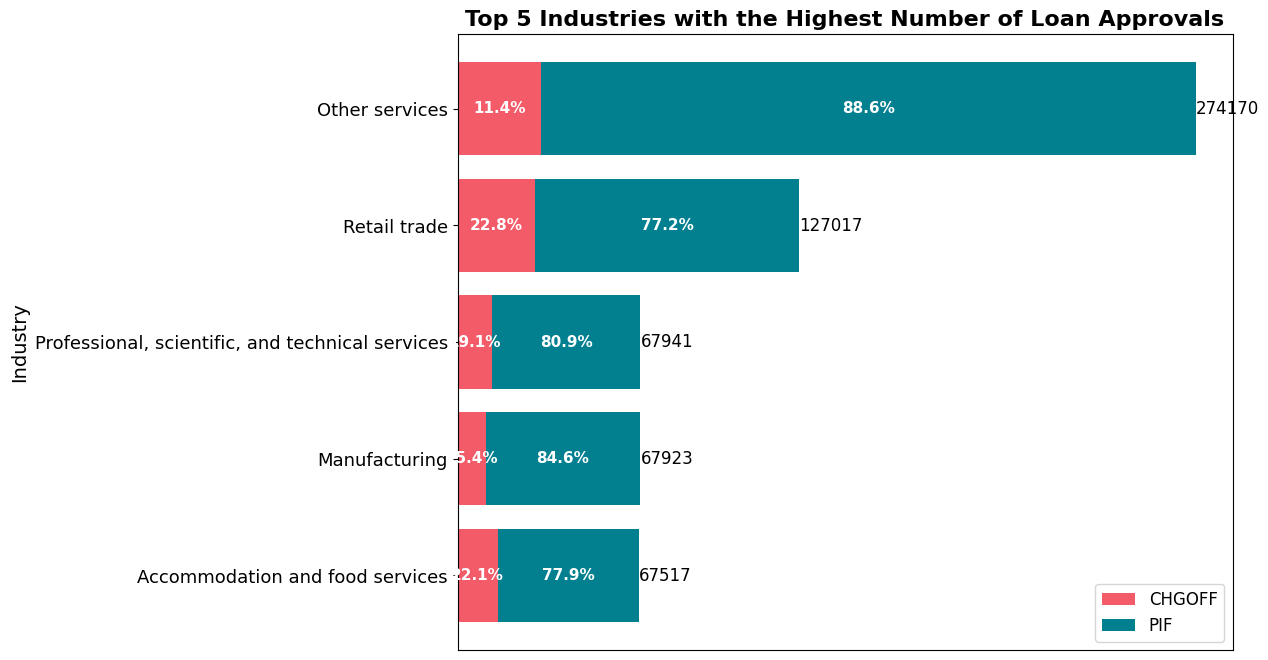

In [13]:
# Create industry_approval DataFrame based on the count of each industry
industry_approval = pd.DataFrame({'Count': data_for_analysis['Industry'].value_counts()}).reset_index()
industry_approval.columns = ['Industry', 'Total']

# Aggregate data by industry and MIS_Status using size
selected_industry_approval = df.groupby(['Industry', 'MIS_Status']).size().unstack(fill_value=0)

# Merge with industry_approval to maintain the order
selected_industry_approval = industry_approval.merge(selected_industry_approval, on='Industry', how='left').fillna(0)

# Filter to include only the top 10 industries
selected_industry_approval = selected_industry_approval.head(5)

# Calculate the percentage of CHGOFF and PIF loans
selected_industry_approval['CHGOFF_Percentage'] = (selected_industry_approval['CHGOFF'] / selected_industry_approval['Total']) * 100
selected_industry_approval['PIF_Percentage'] = (selected_industry_approval['PIF'] / selected_industry_approval['Total']) * 100

# Define color palette
colors = ['#F45B69', '#028090']  # Colors for CHGOFF and PIF

# Plot
plt.figure(figsize=(10, 8))
bars1 = plt.barh(selected_industry_approval['Industry'], selected_industry_approval['CHGOFF'], color=colors[0], label='CHGOFF')
bars2 = plt.barh(selected_industry_approval['Industry'], selected_industry_approval['PIF'], left=selected_industry_approval['CHGOFF'], color=colors[1], label='PIF')

plt.xlabel('')
plt.ylabel('Industry', fontsize=14)
plt.yticks(fontsize=13)
plt.title('Top 5 Industries with the Highest Number of Loan Approvals', fontweight='bold', fontsize=16)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their percentages and total counts
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = selected_industry_approval['Total'].iloc[i]
    chgoff_percentage = selected_industry_approval['CHGOFF_Percentage'].iloc[i]
    pif_percentage = selected_industry_approval['PIF_Percentage'].iloc[i]
    # Annotate CHGOFF percentage
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{chgoff_percentage:.1f}%', ha='center', va='center', fontsize=11, fontweight = 'bold', color='white')
    # Annotate PIF percentage
    plt.text(bar1.get_width() + bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{pif_percentage:.1f}%', ha='center', va='center', fontsize=11, fontweight = 'bold', color='white')
    # Annotate total count
    plt.text(total + 0.5, bar1.get_y() + bar1.get_height() / 2, f'{int(total)}', va='center', fontsize=12)

# Add legend
plt.legend(fontsize = 12)

# Remove x-axis ticks
plt.xticks([])

# Save figure
plt.savefig('loan_approvals_by_industry.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

# Show the plot
plt.show()

### TimeSeries of the Number of Loans Approved

In [59]:
# Create year_approval DataFrame
year_approval = pd.DataFrame({'Count': data_for_analysis['ApprovalFY'].value_counts()}).reset_index()
year_approval = year_approval.rename(columns={'index': 'ApprovalFY'})
year_approval['ApprovalFY'] = year_approval['ApprovalFY'].apply(lambda x: str(x))

# Create a complete list of years
all_years = pd.DataFrame({'ApprovalFY': [str(year) for year in np.arange(1966, 2014)]})

# Merge with existing DataFrame to include missing years
selected_year_approval = pd.merge(all_years, year_approval, on='ApprovalFY', how='left').fillna(0)

# Ensure 'Count' column is of integer type
selected_year_approval['Count'] = selected_year_approval['Count'].astype(int)

# Convert 'ApprovalFY' to a categorical variable with a specific order
selected_year_approval['ApprovalFY'] = pd.Categorical(selected_year_approval['ApprovalFY'], categories=sorted(selected_year_approval['ApprovalFY']), ordered=True)

# Sort the DataFrame by 'ApprovalFY' in ascending order
selected_year_approval = selected_year_approval.sort_values(by='ApprovalFY', ascending=True)

# Create interactive plot with Plotly
fig = px.line(selected_year_approval, x='ApprovalFY', y='Count', markers=True, title='TimeSeries of the Number of SBA Approved Loans', color_discrete_sequence=['#028090']) 


# Customize the layout to remove grid lines and add borders on left and bottom
fig.update_layout(
    xaxis_title='ApprovalFY',
    yaxis_title='Number of Loan Approvals',
    xaxis=dict(
        tickmode='array',
        tickvals=selected_year_approval['ApprovalFY'],
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
    ),
    yaxis=dict(
        tickformat=',',
        showgrid=False,
        showline=True,
        linecolor='black',
        linewidth=1
    ),
    title_font=dict(size=16, family='Arial Black'),
    hovermode='x unified',
    plot_bgcolor='white'  # Set background color to white
)

# fig.write_html("Timeseries_SBA_loan_approval.html")

# Show the plot
fig.show()


#### Percentage of approved: LowDoc / Revolving Line Credit / Franchise / New or Existing Business

In [23]:
data_for_analysis['FranchiseCode_Encoded'].value_counts(dropna=False)

FranchiseCode_Encoded
No     845692
Yes     51736
Name: count, dtype: int64

In [25]:
data_for_analysis['NewExist'].value_counts(dropna=False)

NewExist
1.0    643627
2.0    252633
NaN      1168
Name: count, dtype: int64

In [27]:
data_for_analysis['RevLineCr'].value_counts(dropna=False)

RevLineCr
N      419434
NaN    277269
Y      200725
Name: count, dtype: int64

In [31]:
lowdoc_pie = data_for_analysis['LowDoc'].map({'Y' : "LowDoc", 'N': "Not LowDoc"})
franchise_pie = data_for_analysis['FranchiseCode_Encoded'].map({'Yes' : "Franchise", 'No': "Not Franchise"})
revline_pie = data_for_analysis['RevLineCr'].map({'Y' : "Revolving Loan", 'N': "Not Revolving", np.nan : "Missing"})
newexist_pie = data_for_analysis['NewExist'].map({1.0 : "New Business", 2.0: "Existing Business",np.nan : "Missing"})

df_pie = pd.DataFrame({'LowDoc_Encoded': lowdoc_pie,
                       'FranchiseCode_Encoded': franchise_pie,
                       'RevLineCr_Encoded': revline_pie, 
                       'NewExist_Encode':  newexist_pie})

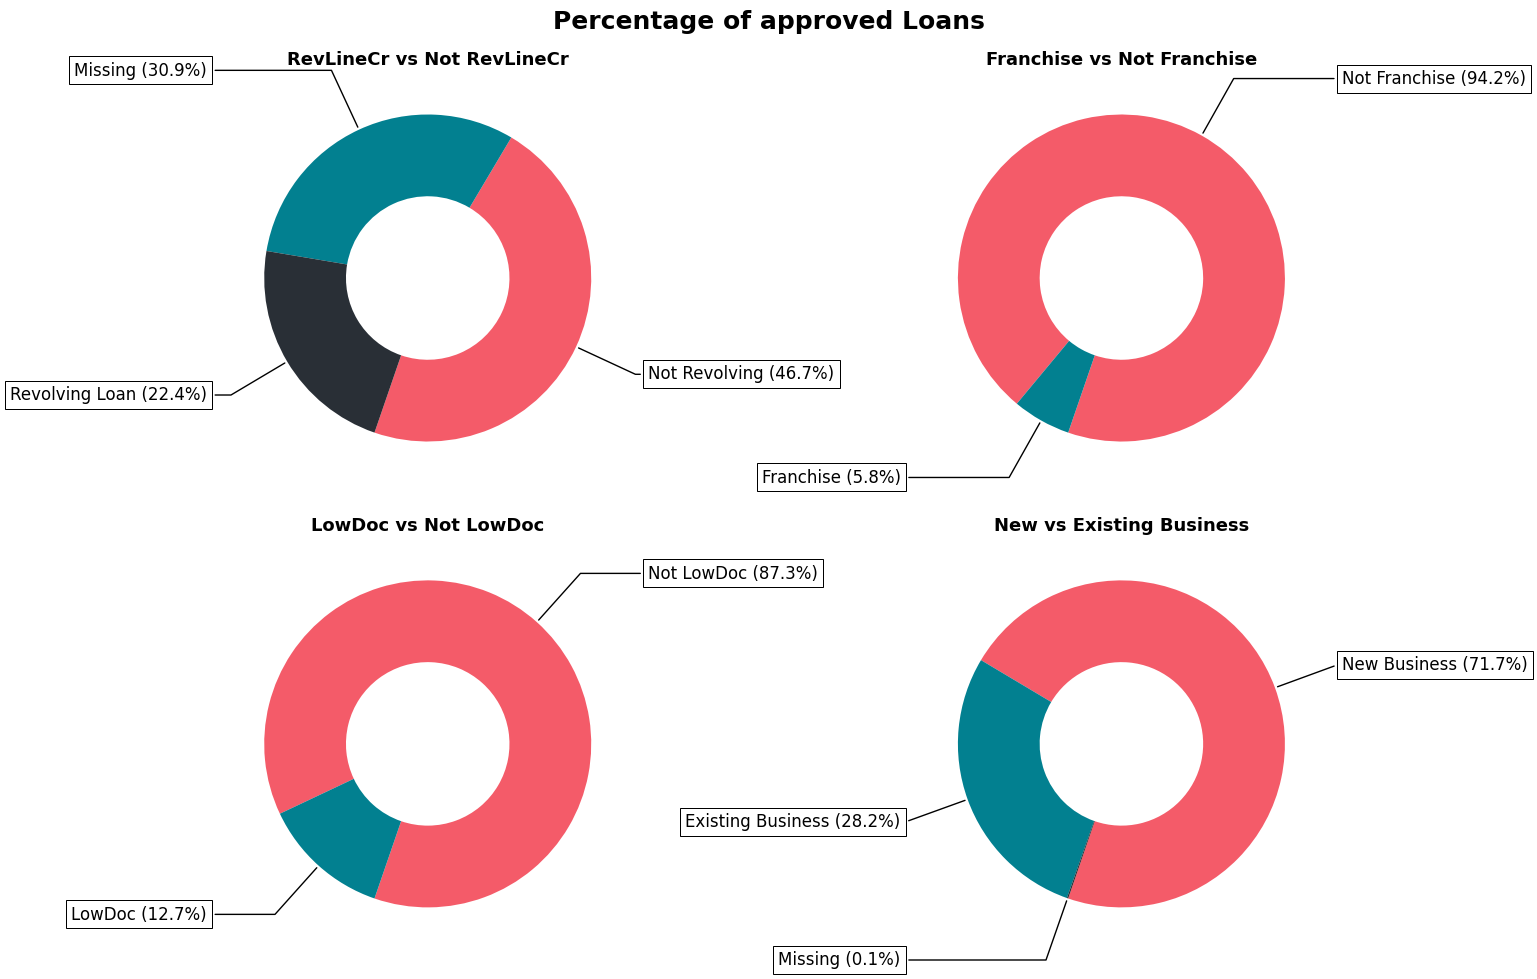

In [32]:
# Ensure interactive backend
%matplotlib inline

# Define a function to create pie charts
def create_pie_chart(ax, data, column, title, colors):
    ratio = data[column].value_counts(dropna=False).reset_index()
    ratio.columns = [column, 'count']
    ratio['Percentage'] = (ratio['count'] / ratio['count'].sum()) * 100

    # Check for missing data and fill with 'Missing' if any
    if ratio[column].isnull().any():
        ratio[column].fillna('Missing', inplace=True)
    
    wedges, texts = ax.pie(ratio['count'], wedgeprops=dict(width=0.5), startangle=-109, colors=colors)
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        
        label = f"{ratio[column][i]} ({ratio['Percentage'][i]:.1f}%)"
        ax.annotate(
            label, fontsize = 12,
            xy=(x, y), 
            xytext=(1.35 * np.sign(x), 1.4 * y),
            horizontalalignment=horizontalalignment, 
            **kw
        )
    
    ax.set_title(title, fontsize=13, weight="bold")

# Define color palette
colors = ['#F45B69', '#028090', '#292F36'] # 292F36, (tl),F7FFF7, FF6B6B,

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(aspect="equal"))

# Create pie charts for each parameter
create_pie_chart(axs[0, 0], df_pie, 'RevLineCr_Encoded', 'RevLineCr vs Not RevLineCr', colors)
create_pie_chart(axs[0, 1], df_pie, 'FranchiseCode_Encoded', 'Franchise vs Not Franchise', colors)
create_pie_chart(axs[1, 0], df_pie, 'LowDoc_Encoded', 'LowDoc vs Not LowDoc', colors)
create_pie_chart(axs[1, 1], df_pie, 'NewExist_Encode', 'New vs Existing Business', colors)

# Add plot
plt.suptitle('Percentage of approved Loans', fontsize=18, fontweight= 'bold')

# Adjust layout
plt.tight_layout()
plt.show()

### Terms Approved by Region and Economic Active Period

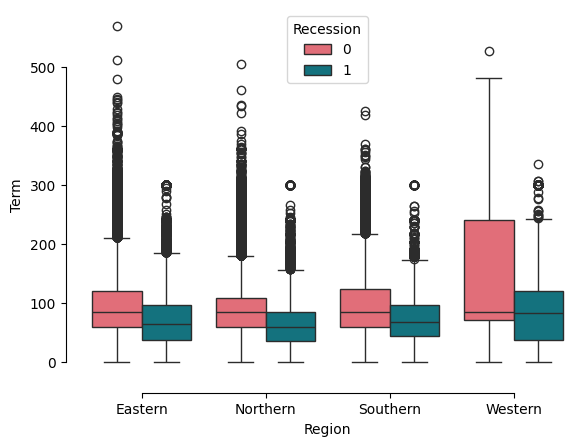

In [34]:
# sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Region", y="Term",
            hue="Recession", palette = ['#F45B69', '#028090'],
            data=data_for_analysis)
sns.despine(offset=10, trim=True)

# Save figure
plt.savefig('loan_approvals_by_term_and_recession.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

### Loan Performance by Economic Impact (Recession)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_39093/2566550195.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_39093/2566550195.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_39093/2566550195.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




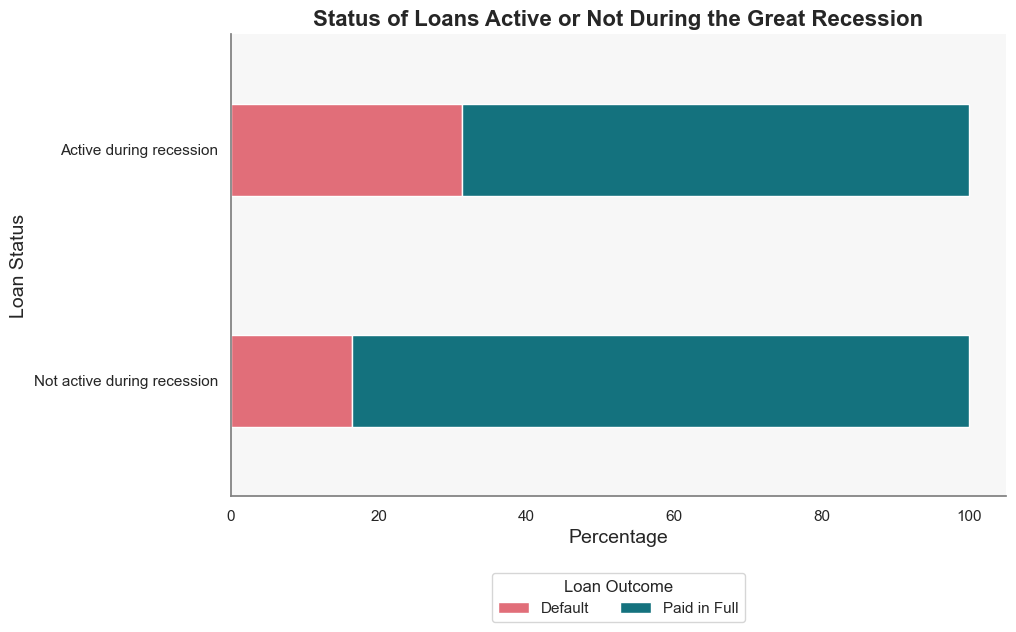

In [37]:

# Determine the status of loans during the recession
data_for_analysis['Status'] = np.where(data_for_analysis['Recession'] == 1, 'Active during recession', 'Not active during recession')

# Aggregate data to calculate the percentages of CHGOFF and PIF
status_agg = data_for_analysis.groupby(['Status', 'MIS_Status']).size().reset_index(name='Count')
total_counts = data_for_analysis.groupby('Status').size().reset_index(name='Total')
status_agg = pd.merge(status_agg, total_counts, on='Status')
status_agg['Percentage'] = (status_agg['Count'] / status_agg['Total']) * 100

# Prepare data for plotting
plot_data = status_agg.pivot(index='Status', columns='MIS_Status', values='Percentage').reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
bar1 = sns.barplot(data=plot_data, x='CHGOFF', y='Status', color='#F45B69', label='Default', ci=None, width=bar_width)
bar2 = sns.barplot(data=plot_data, x='PIF', y='Status', color='#028090', label='Paid in Full', ci=None, width=bar_width, left=plot_data['CHGOFF'])

# Customize the plot
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)
plt.title('Status of Loans Active or Not During the Great Recession', fontsize=16, fontweight='bold')

# Remove grid lines
plt.grid(False)

# Add a light grey background
plt.gca().set_facecolor('#f7f7f7')

# Add a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Place the legend below the plot
plt.legend(title='Loan Outcome', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# Save figure
plt.savefig('loan_approvals_by_recession.png', format='png', dpi=300, bbox_inches='tight', transparent=False)

# Show the plot
plt.show()

### Loan Amount and Job Creation / Retained Jobs

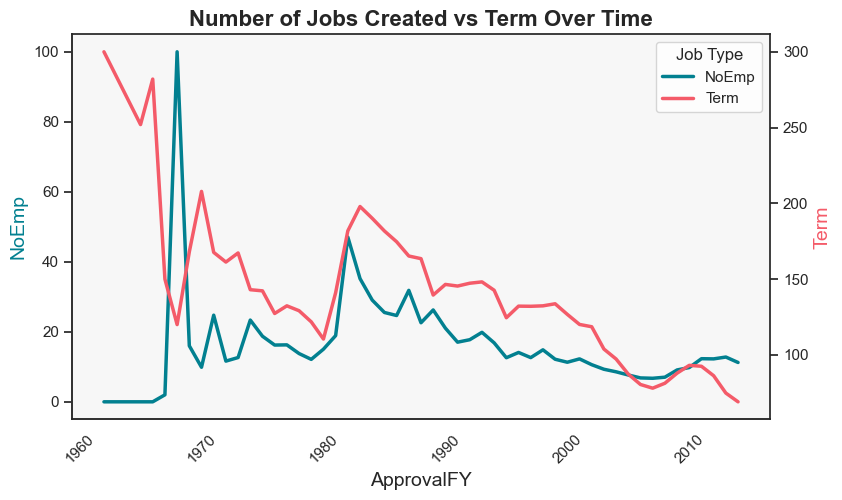

In [49]:
# Set the theme
import contextlib
sns.set_theme(style="white")

# Create the figure and the primary axes
plt.figure(figsize=(9, 5))
ax1 = plt.gca()

# Plot 'NoEmp' on the primary axes
sns.lineplot(data=data_for_analysis, x='ApprovalFY', y='NoEmp', label='NoEmp', linewidth=2.5, color='#028090', errorbar=None, ax=ax1)

# Create the secondary axes
ax2 = ax1.twinx()

# Plot 'Term' on the secondary axes
sns.lineplot(data=data_for_analysis, x='ApprovalFY', y='Term', label='Term', linewidth=2.5, color='#F45B69', errorbar=None, ax=ax2)

# Customize the plot
ax1.set_xlabel('ApprovalFY', fontsize=14)
ax1.set_ylabel('NoEmp', fontsize=14, color='#028090')  # Label for primary y-axis
ax2.set_ylabel('Term', fontsize=14, color='#F45B69')  # Label for secondary y-axis
plt.title('Number of Jobs Created vs Term Over Time', fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis ticks on the primary axes

# Remove the automatically generated legends from both axes
with contextlib.suppress(AttributeError):
    ax1.get_legend().remove()
    ax2.get_legend().remove()

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, title='Job Type')

# Remove grid lines
ax1.grid(False)

# Add a light grey background
ax1.set_facecolor('#f7f7f7')

# Add a border around the plot (applied to primary axes)
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax1.spines[spine].set_color('grey')


# Show the plot
plt.show()